## Question 1: Happiness

In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
import time
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [310]:
# read data
data2015original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2015.csv")
data2016original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2016.csv")
data2017original = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2017.csv")
print (data2015original.shape)
print (data2016original.shape)
print (data2017original.shape)

(158, 12)
(157, 13)
(155, 12)


In [311]:
data2015 = data2015original
data2016 = data2016original
data2017 = data2017original

# preprocess data

#drop country name because it's not a useful feature
#drop happiness features because it's the output
data2015 = data2015.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error'], axis=1)
data2016 = data2016.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
data2017 = data2017.drop(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low'], axis=1)
#convert region to categorical indicators using get_dummies
data2015 = pd.get_dummies(data2015, columns=['Region'])
data2016 = pd.get_dummies(data2016, columns=['Region'])
print (data2015.shape)
print (data2016.shape)
print (data2017.shape)

(158, 17)
(157, 17)
(155, 7)


## Preliminary Visualization

(158, 17)


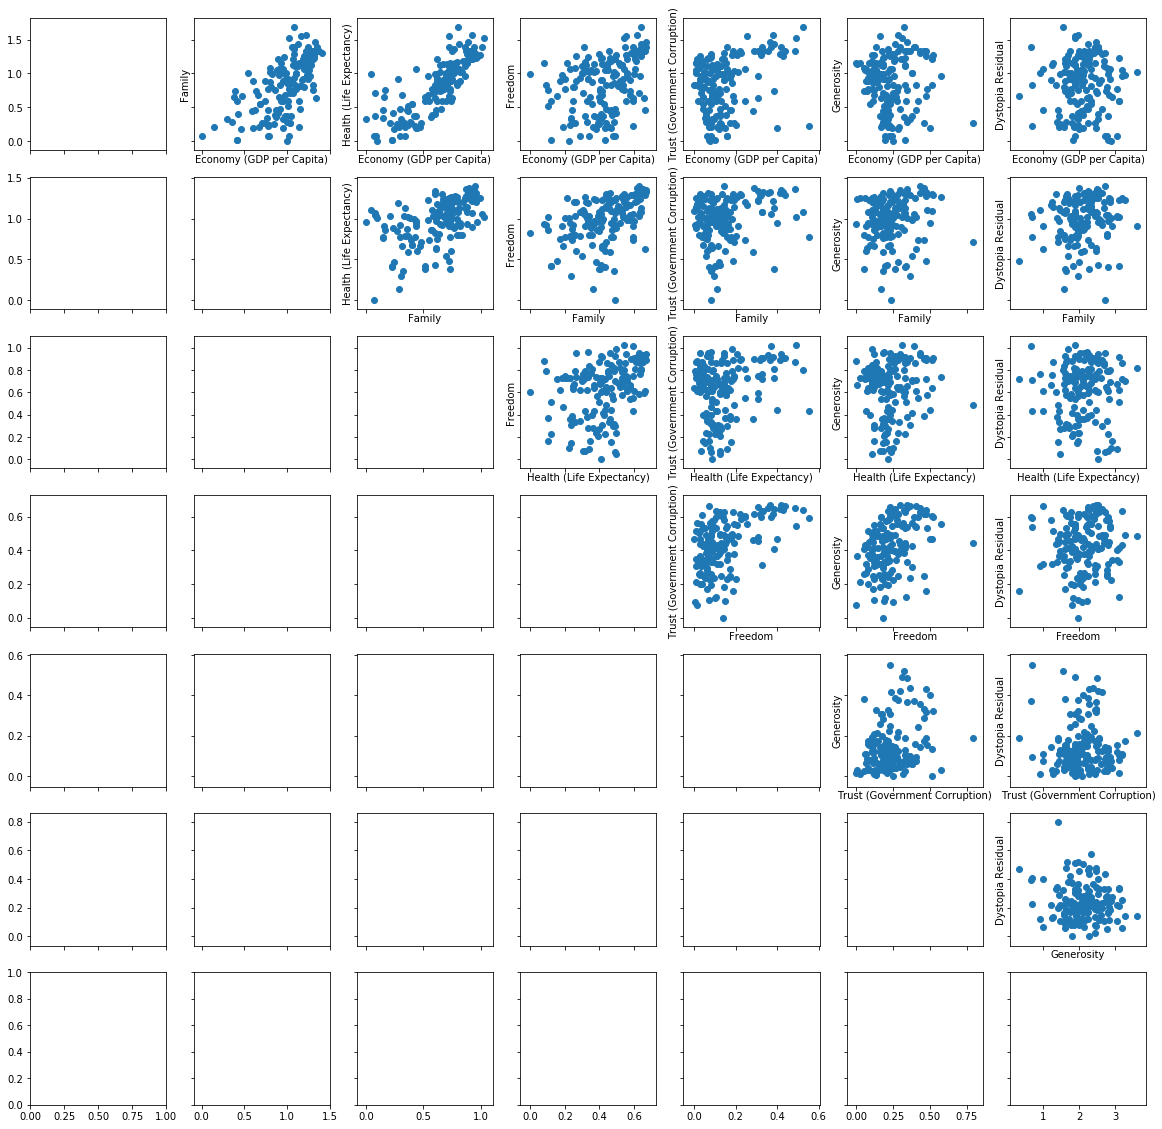

In [312]:
#Premilinary visualization on 2015 data
titles = data2015.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2015[titles[n]], data2015[titles[m]])
        ax[m,n].set(xlabel=titles[m], ylabel=titles[n])
#        cell.set_ylabel(titles[j])
#        #ax[m,n].xlabel(titles[n])
#        #ax[m,n].ylabel(titles[m])
#for i, row in enumerate(ax):
#    for j, cell in enumerate(row):
#        cell.set_xlabel(titles[i])
#        cell.set_ylabel(titles[j])
        
print (data2015.shape)
plt.show()

We can see that there is correlation between economy and family size, and economy and life expectancy. Other correlations appear to be less strong.

(157, 17)


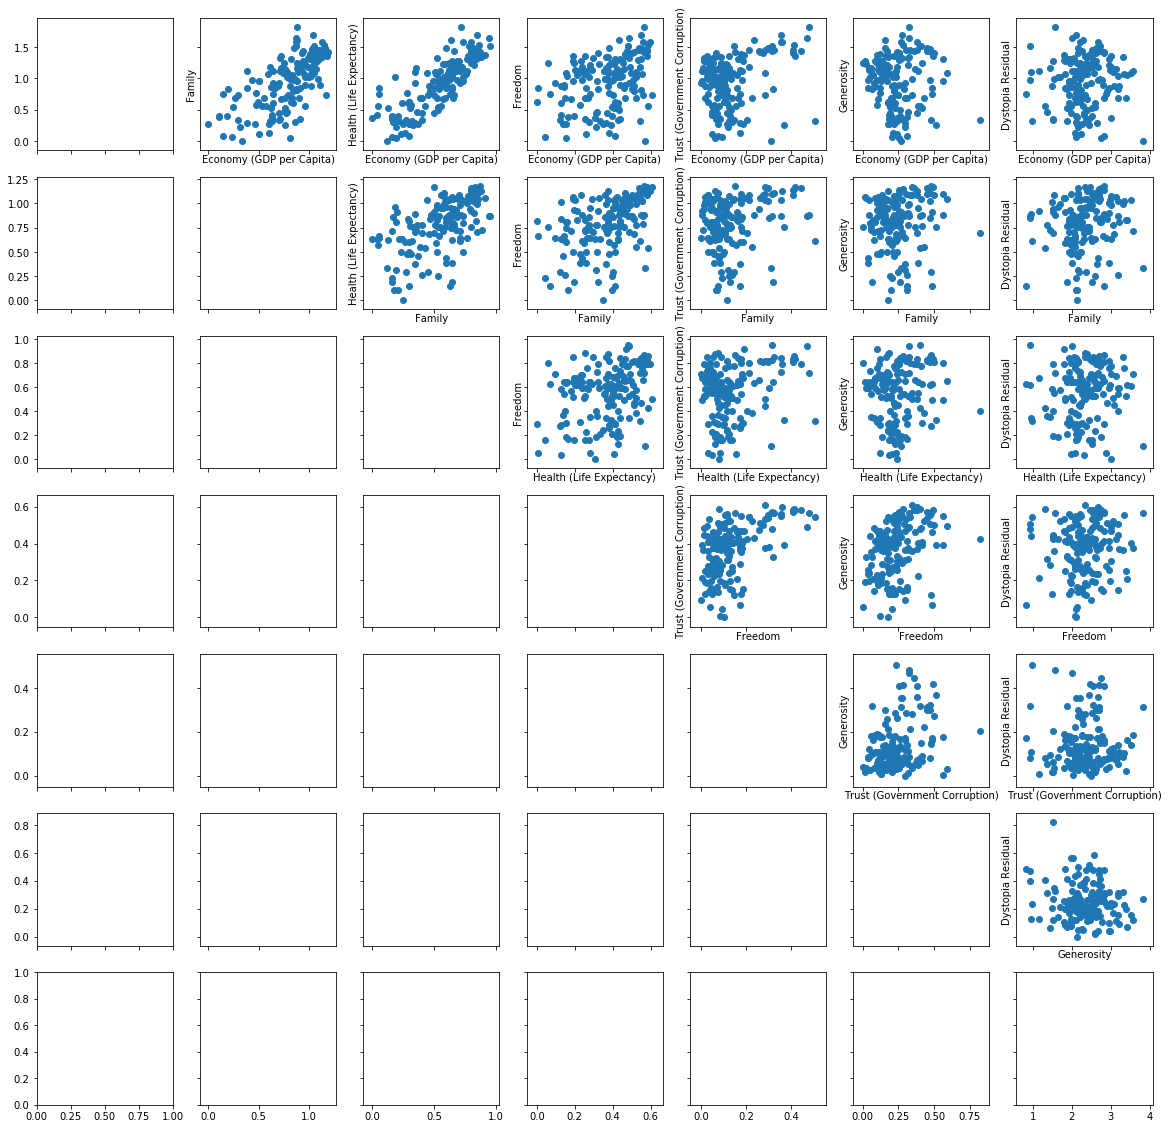

In [313]:
#visualization on 2016data
titles = data2016.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2016[titles[n]], data2016[titles[m]])
        ax[m,n].set(xlabel=titles[m], ylabel=titles[n])
#        cell.set_ylabel(titles[j])
#        #ax[m,n].xlabel(titles[n])
#        #ax[m,n].ylabel(titles[m])
#for i, row in enumerate(ax):
#    for j, cell in enumerate(row):
#        cell.set_xlabel(titles[i])
#        cell.set_ylabel(titles[j])
        
print (data2016.shape)
plt.show()

(155, 7)


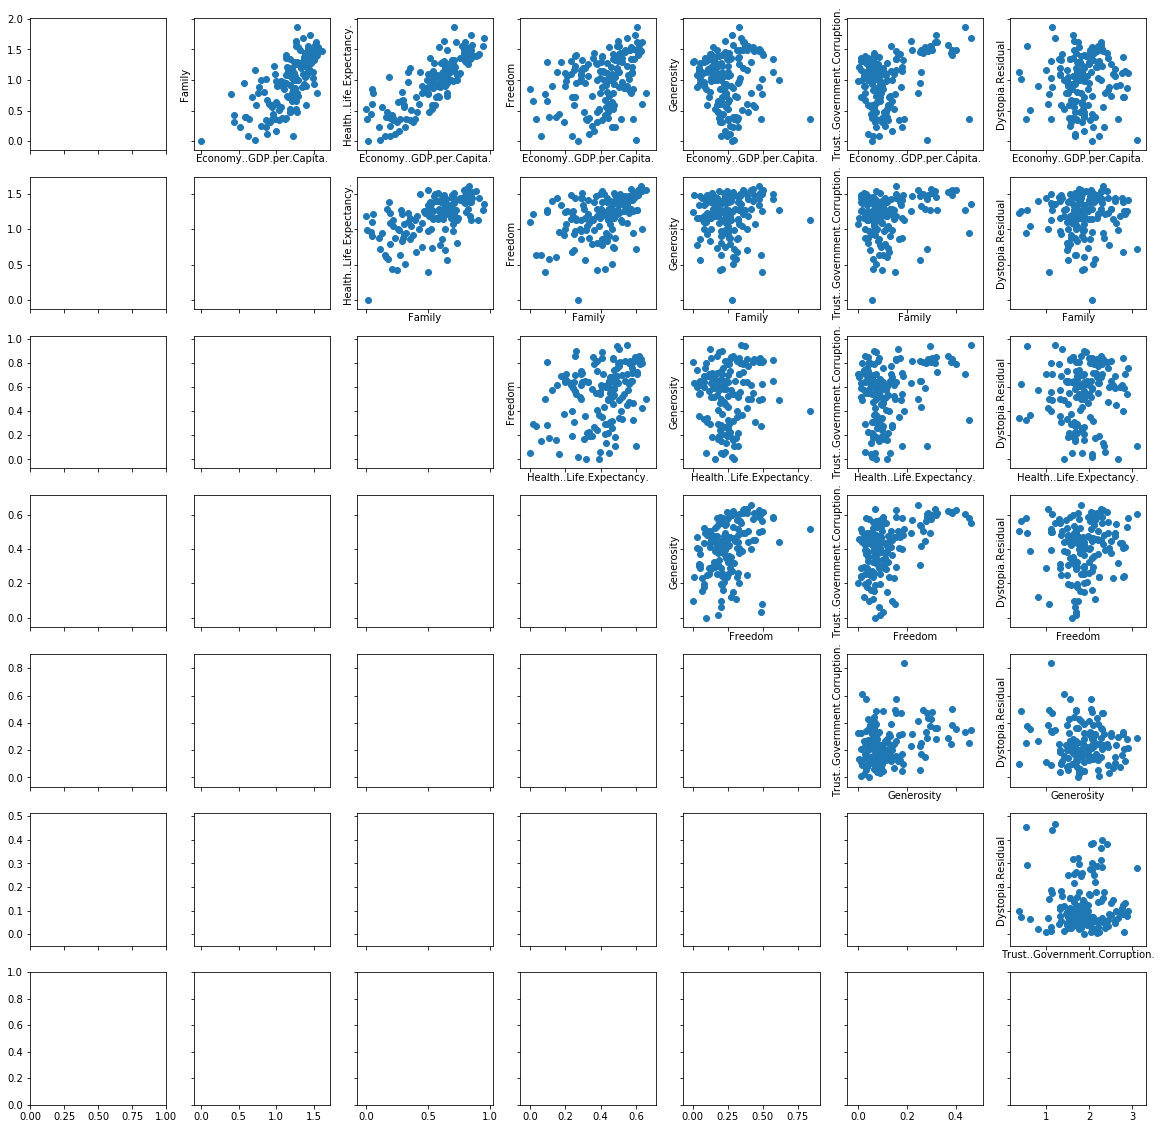

In [314]:
#Premilinary visualization on 2017 data
titles = data2017.axes[1]
f, ax = plt.subplots(7, 7, figsize=(20, 20), sharex='col', sharey='row')
for m in range(6):
    for n in range(m+1, 7):
        ax[m,n].scatter(data2017[titles[n]], data2017[titles[m]])
        ax[m,n].set(xlabel=titles[m], ylabel=titles[n])
#        cell.set_ylabel(titles[j])
#        #ax[m,n].xlabel(titles[n])
#        #ax[m,n].ylabel(titles[m])
#for i, row in enumerate(ax):
#    for j, cell in enumerate(row):
#        cell.set_xlabel(titles[i])
#        cell.set_ylabel(titles[j])
        
print (data2017.shape)
plt.show()

## PCA Dimension Reduction

The number of principle components with the highest ratio of variance to components is 6
Using 6 components will preserve 88.52% of the data


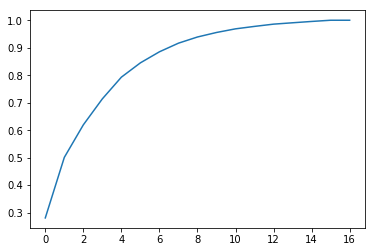

(158, 6)


In [315]:
#PCA Dimension on 2015 data
pca = PCA().fit(data2015)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 2
for n in range(3,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data2015)
data2015 = pca.transform(data2015)
print (data2015.shape)

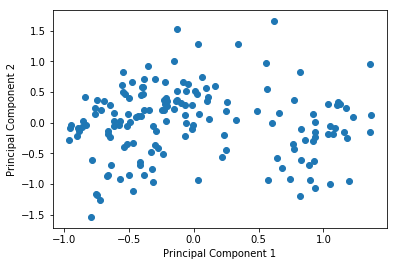

In [316]:
plt.scatter([n[0] for n in data2015],[n[1] for n in data2015])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The number of principle components with the highest ratio of variance to components is 6
Using 6 components will preserve 88.49000000000001% of the data


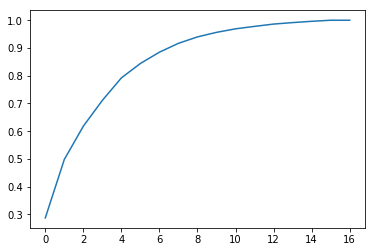

(157, 6)


In [317]:
#pca reduction on data2016
pca = PCA().fit(data2016)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 2
for n in range(3,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data2016)
data2016 = pca.transform(data2016)
print (data2016.shape)

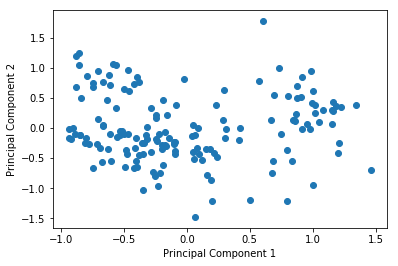

In [318]:
plt.scatter([n[0] for n in data2016],[n[1] for n in data2016])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The number of principle components with the highest ratio of variance to components is 2
Using 2 components will preserve 90.84% of the data


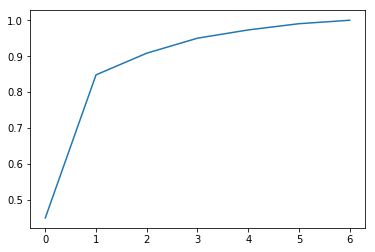

(155, 2)


In [319]:
#PCA Dimension on 2017 data
pca = PCA().fit(data2017)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 2
for n in range(3,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data2017)
data2017 = pca.transform(data2017)
print (data2017.shape)

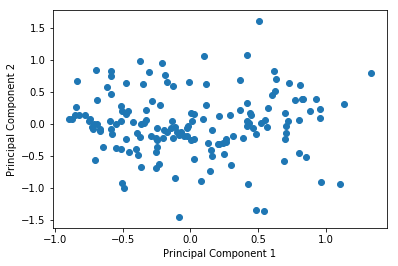

In [320]:
plt.scatter([n[0] for n in data2017],[n[1] for n in data2017])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## KMeans

In [321]:

print (data2015.shape)
print (data2016.shape)
print (data2017.shape)
print (data2015original.shape)
print (data2016original.shape)
print (data2017original.shape)

(158, 6)
(157, 6)
(155, 2)
(158, 12)
(157, 13)
(155, 12)


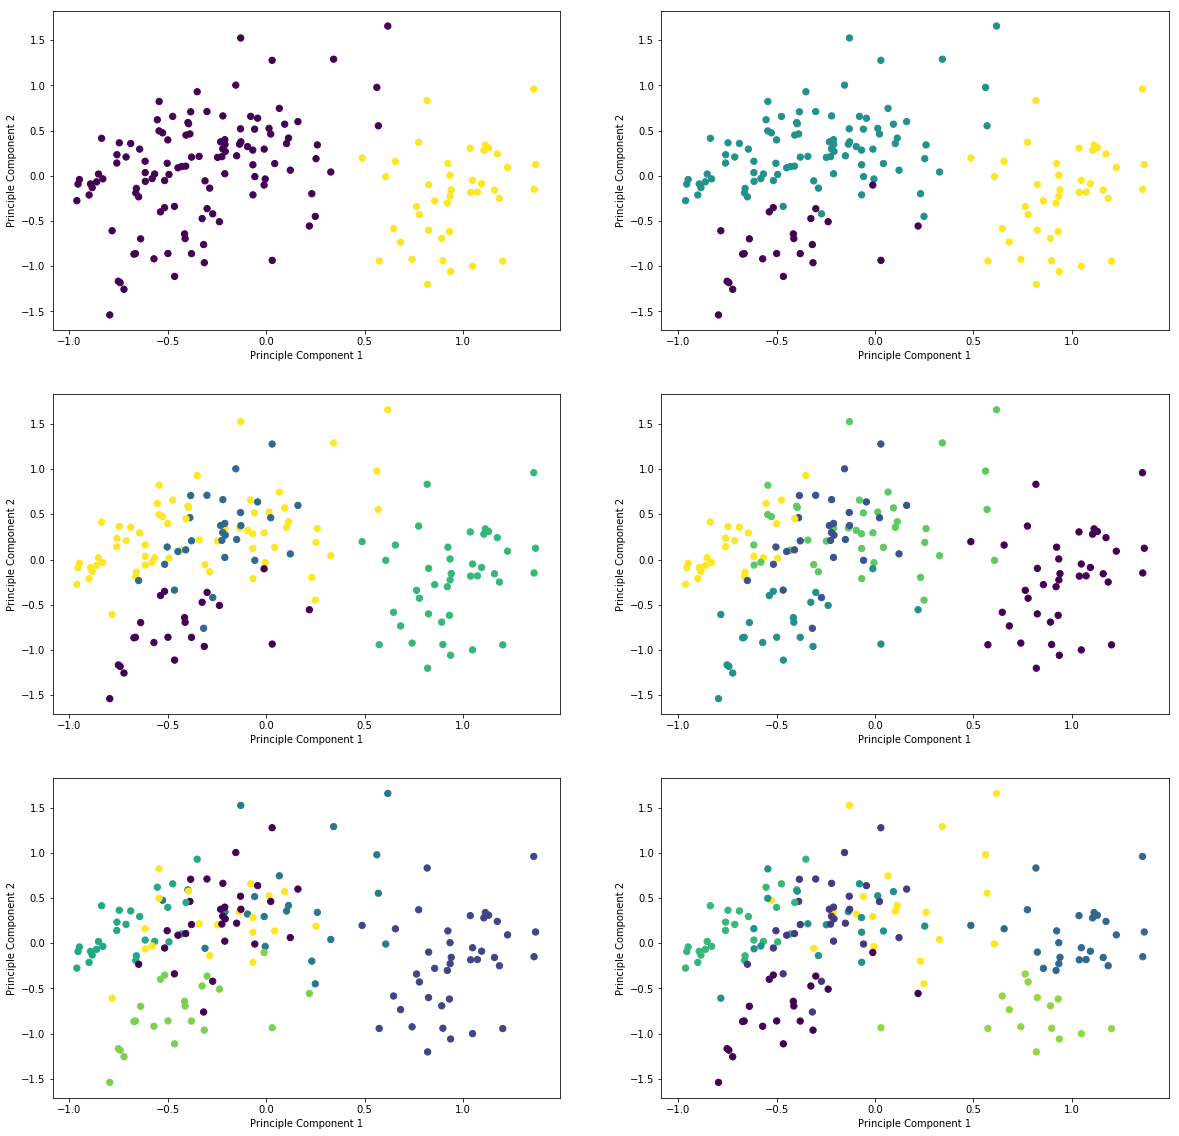

In [322]:
#Kmeans on 2015 data
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2015)
    labels = kmeans.predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

In [323]:
kmeans = KMeans(n_clusters=len(data2015), random_state=int(time.time()))
kmeans.fit(data2015)
labels = kmeans.predict(data2015)
data2015original['kmeans'] = labels

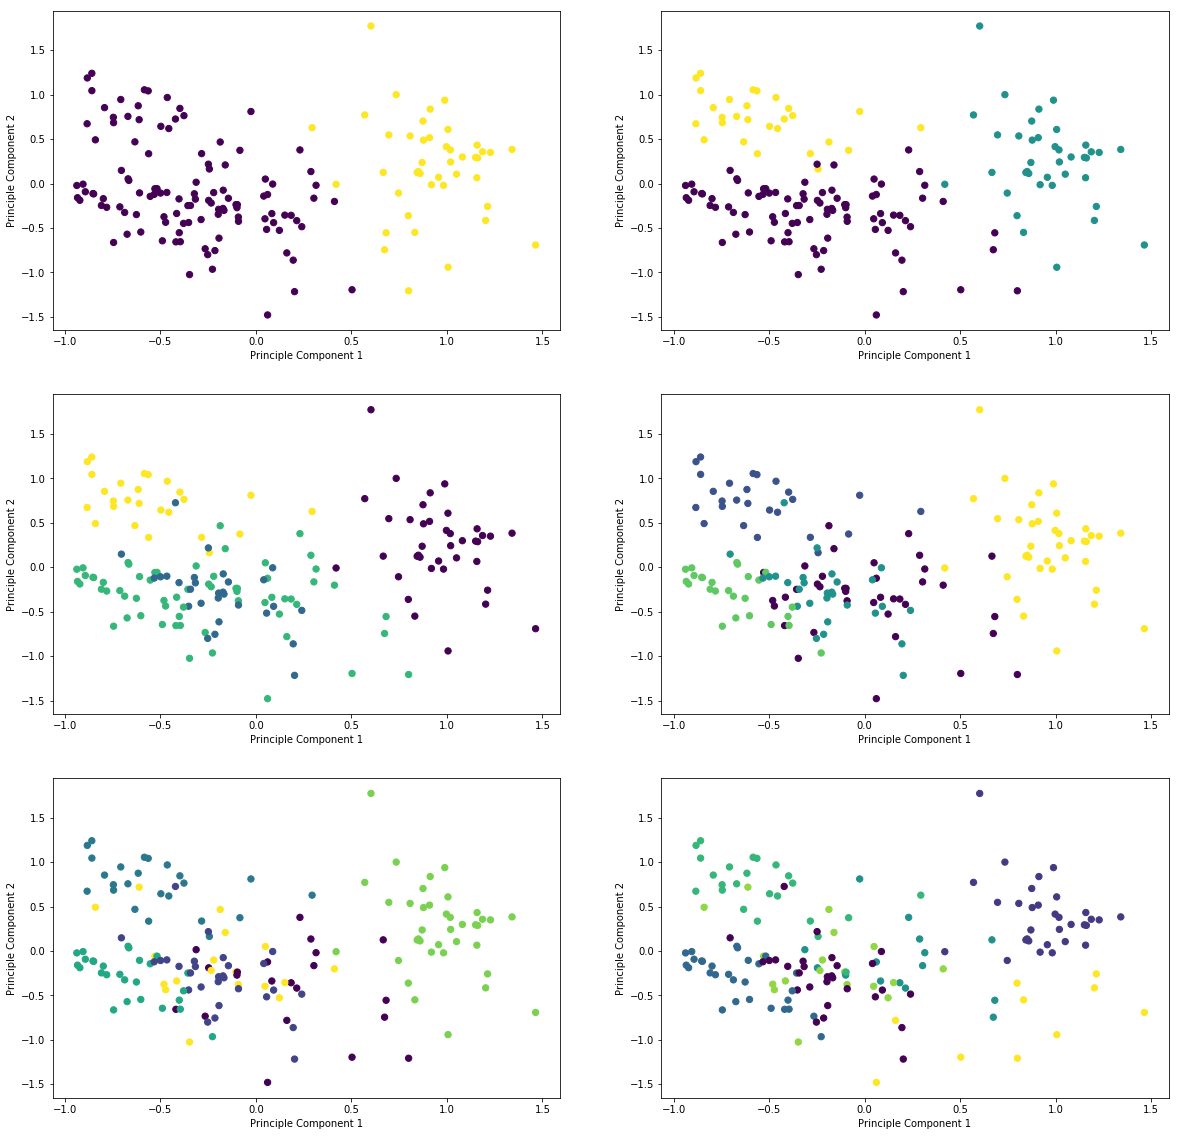

In [324]:
#Kmeans on 2016 data
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2016)
    labels = kmeans.predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

In [325]:
kmeans = KMeans(n_clusters=len(data2016), random_state=int(time.time()))
kmeans.fit(data2016)
labels = kmeans.predict(data2016)
data2016original['kmeans'] = labels

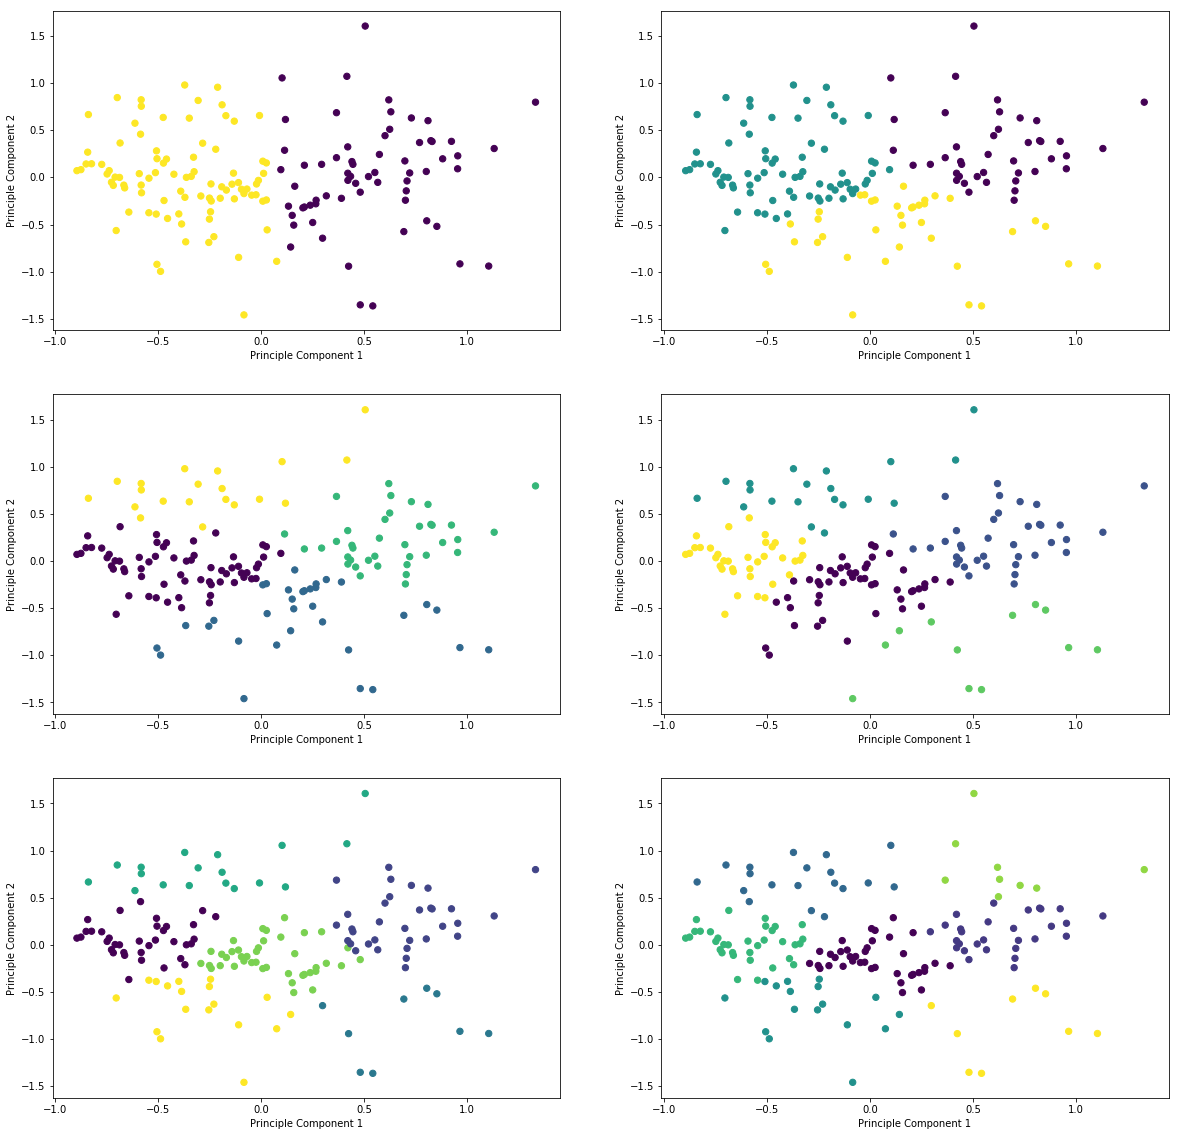

In [326]:
#Kmeans on 2017 data
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    kmeans.fit(data2017)
    labels = kmeans.predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="o", s=40, cmap='viridis')
plt.show()

In [327]:
kmeans = KMeans(n_clusters=len(data2017), random_state=int(time.time()))
kmeans.fit(data2017)
labels = kmeans.predict(data2017)
data2017original['kmeans'] = labels

## GMM

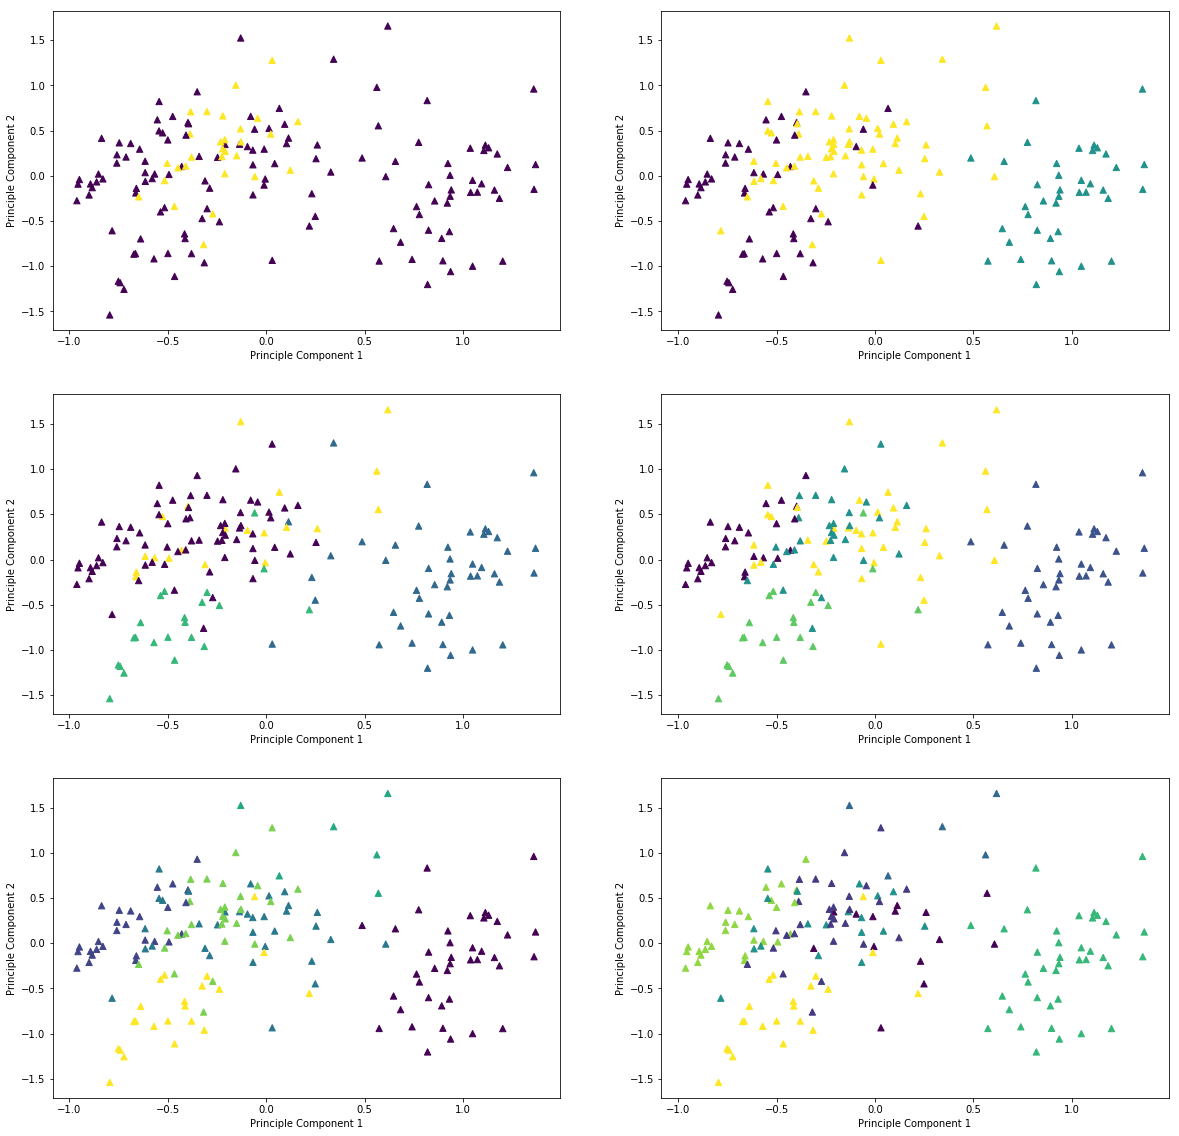

In [328]:
#GMM for 2015 data
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2015)
    gmm.fit(data2015)
    labels = gmm.predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

In [329]:
gmm = GaussianMixture(n_components=len(data2015), covariance_type='full').fit(data2015)
gmm.fit(data2015)
labels = gmm.predict(data2015)
data2015original['gmm'] = labels

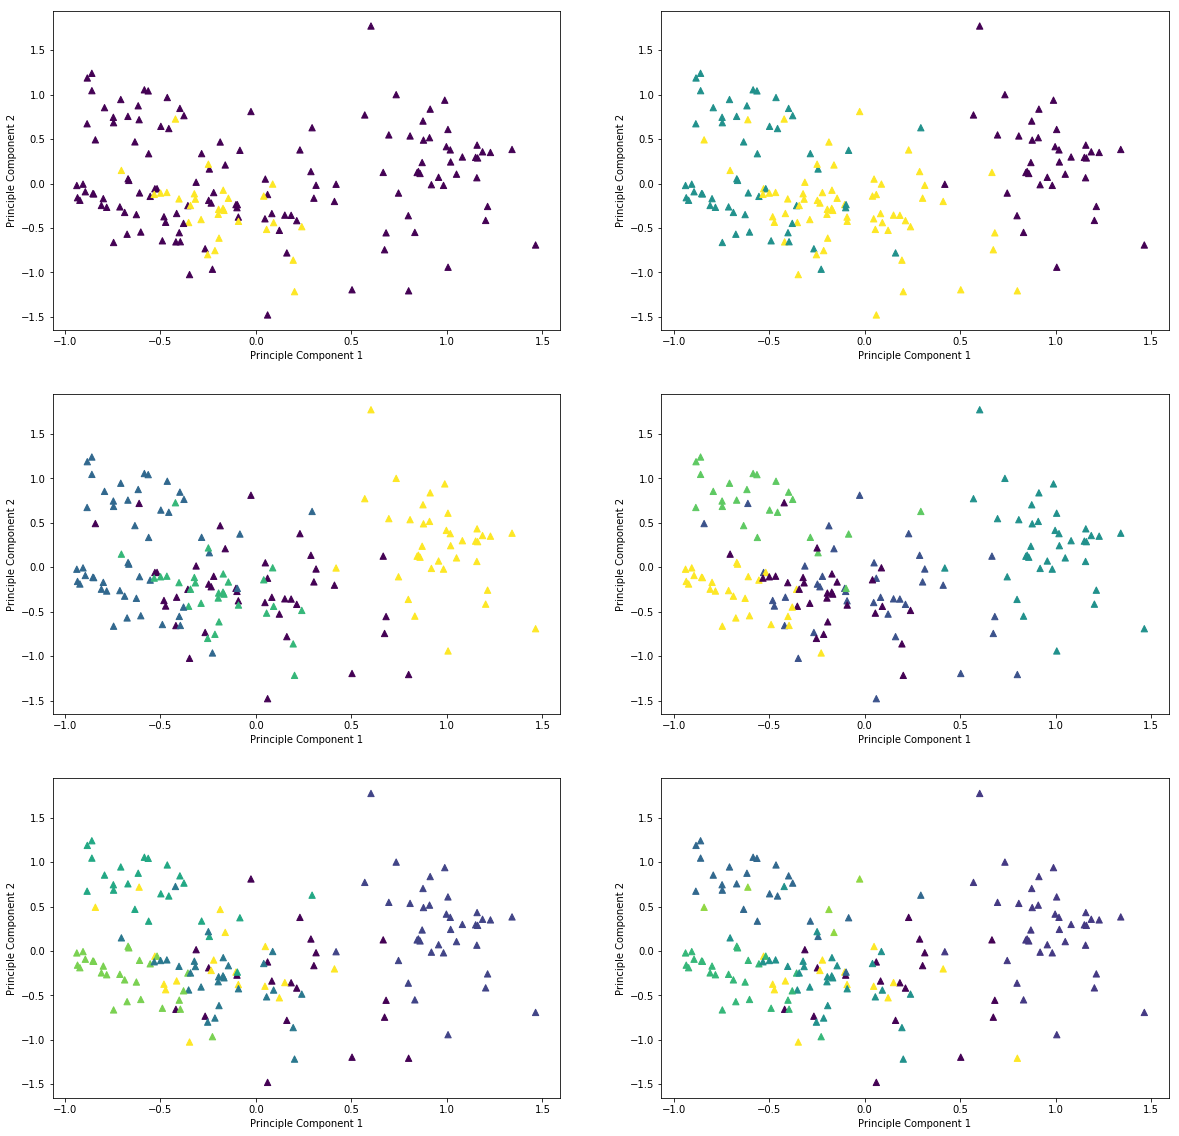

In [330]:
#GMM on 2016 data
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2016)
    gmm.fit(data2016)
    labels = gmm.predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

In [331]:
gmm = GaussianMixture(n_components=len(data2016), covariance_type='full').fit(data2016)
gmm.fit(data2016)
labels = gmm.predict(data2016)
data2016original['gmm'] = labels

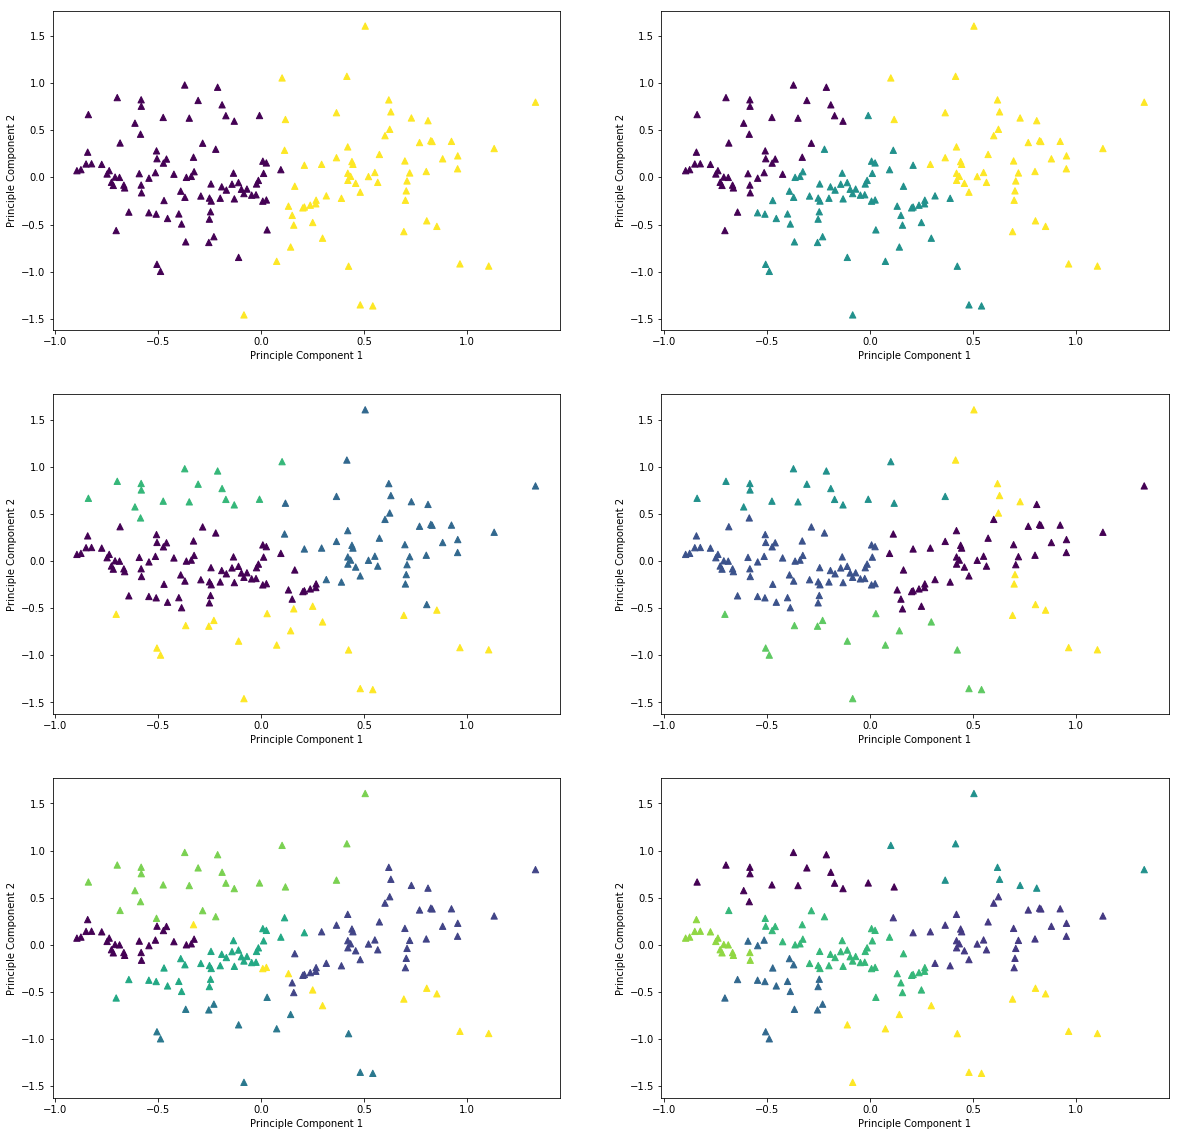

In [332]:
#GMM on 2017 data
plt.figure(figsize=(20,20))
for numComponents in range(2, 8):
    plt.subplot(3,2,numComponents-1)
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full').fit(data2017)
    gmm.fit(data2017)
    labels = gmm.predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="^", s=40, cmap='viridis')
plt.show()

In [333]:
gmm = GaussianMixture(n_components=len(data2017), covariance_type='full').fit(data2017)
gmm.fit(data2017)
labels = gmm.predict(data2017)
data2017original['gmm'] = labels

## AgglomerativeClusutering

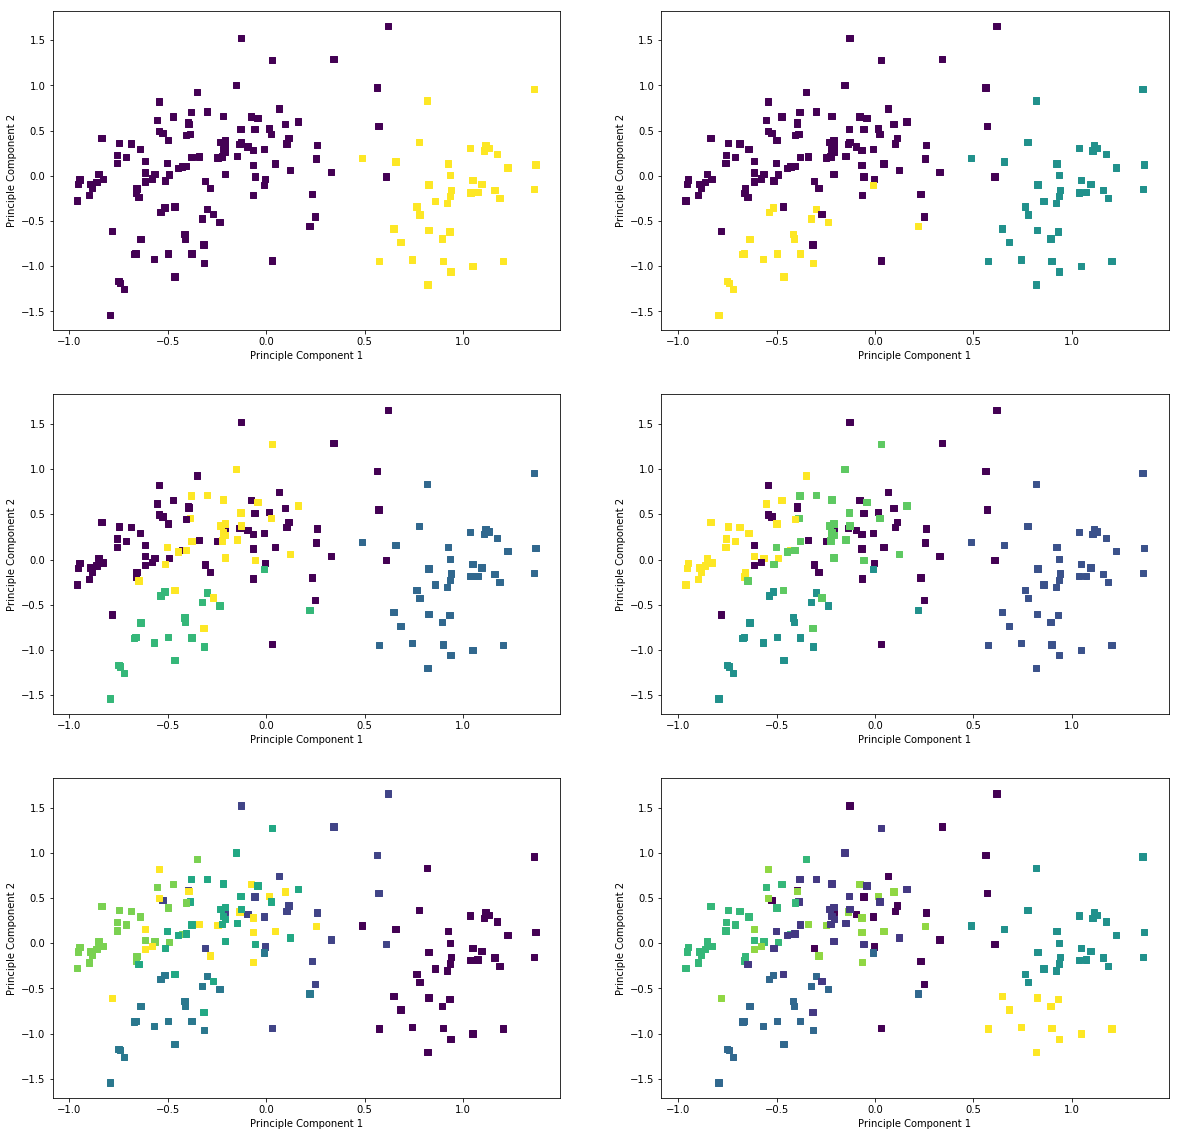

In [334]:
#Agglomerativeclustering on 2015 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

In [335]:
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=len(data2015), pooling_func='deprecated')
labels = agglo.fit_predict(data2015)
data2015original['agglo'] = labels

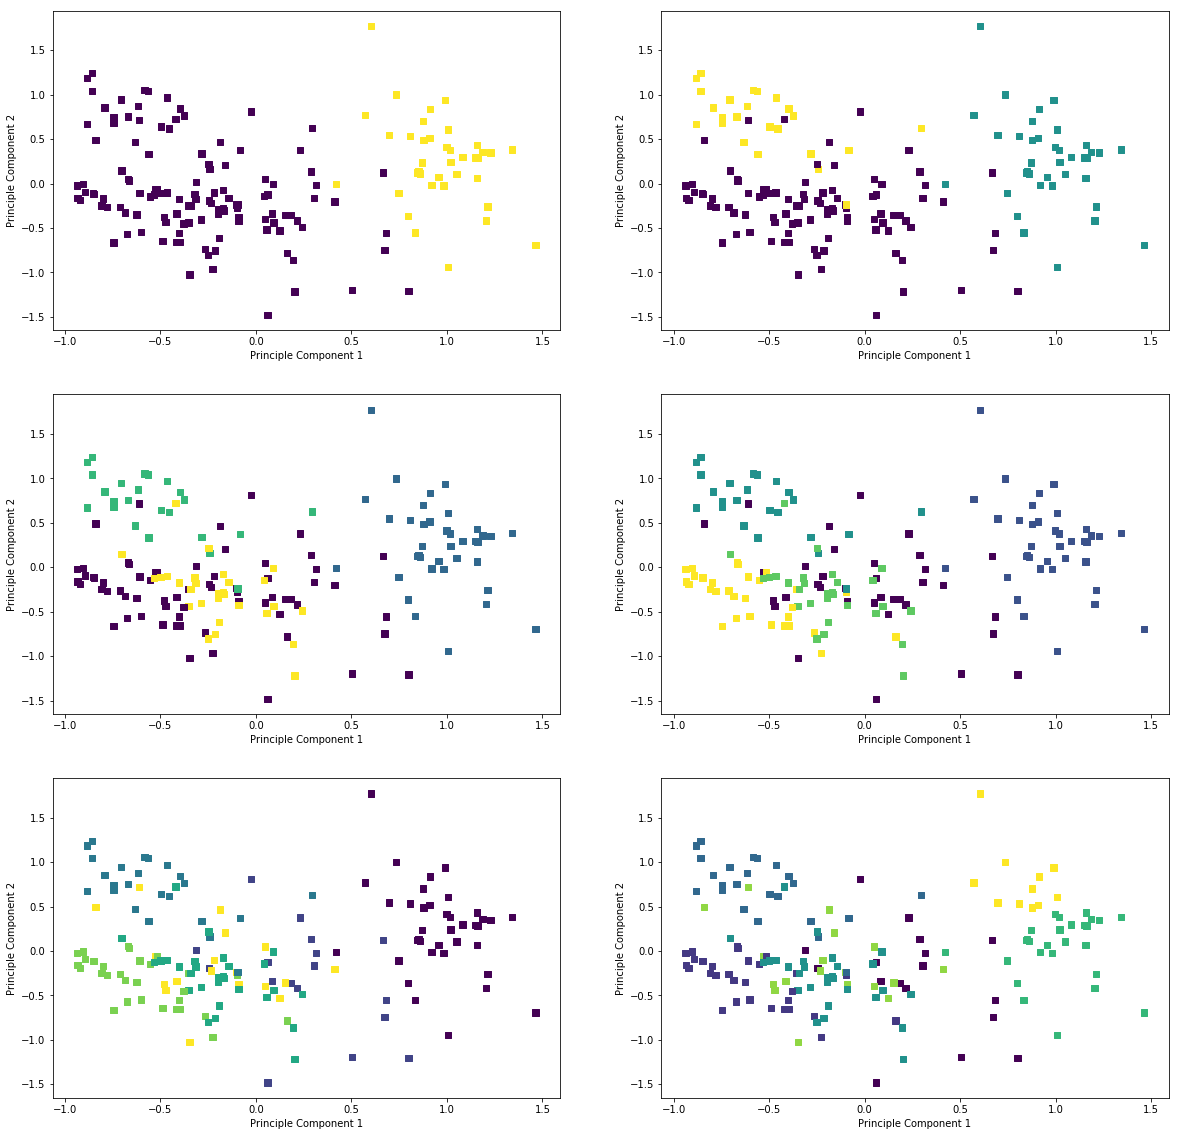

In [336]:
#Agglomerativeclustering on 2016 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

In [337]:
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=len(data2016), pooling_func='deprecated')
labels = agglo.fit_predict(data2016)
data2016original['agglo'] = labels

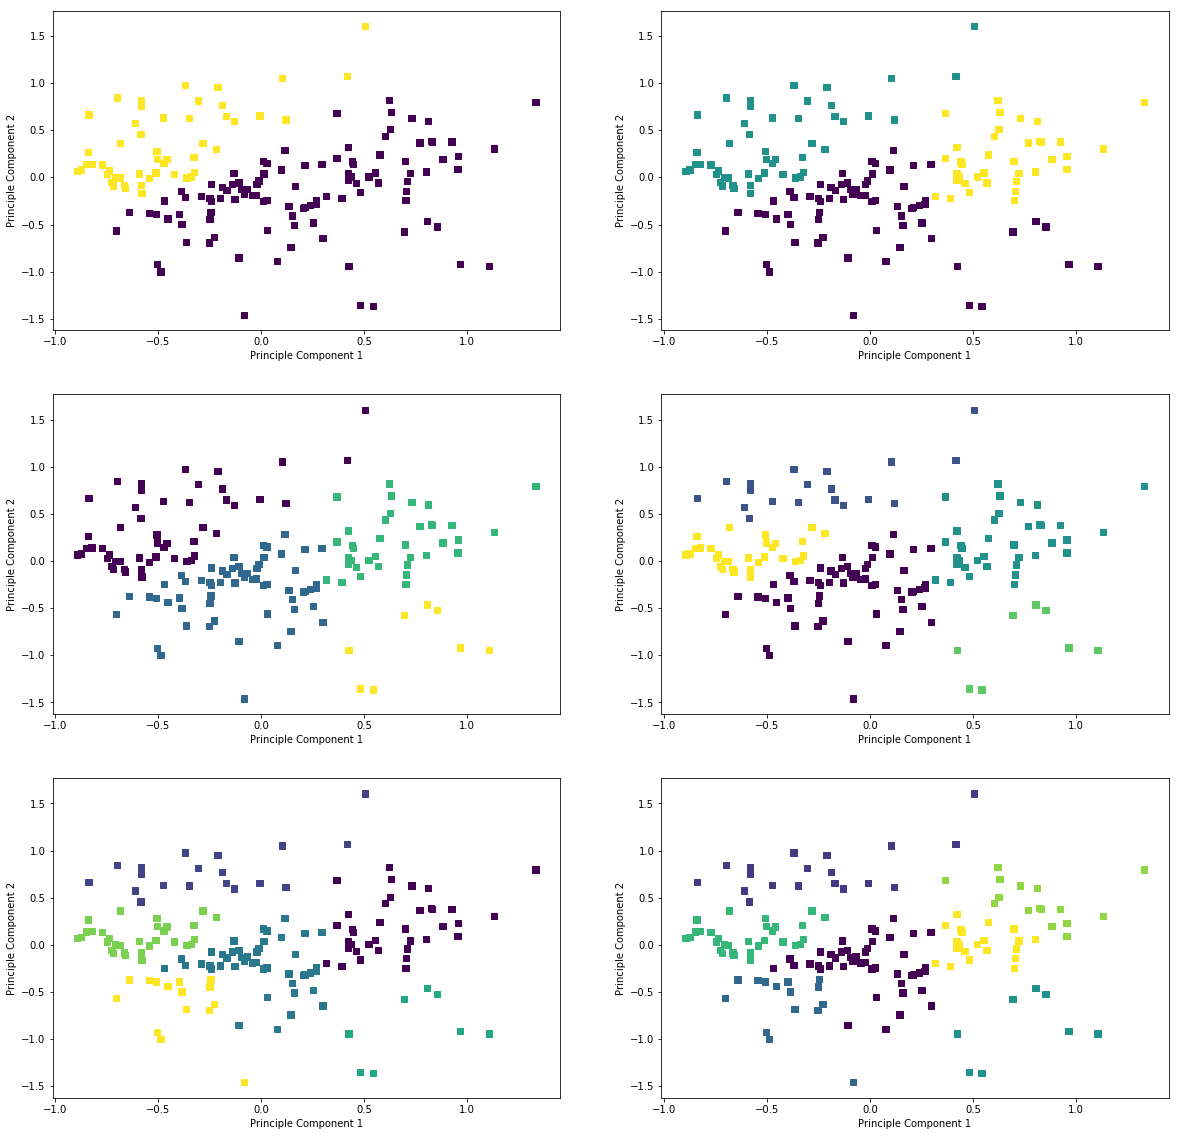

In [338]:
#Agglomerativeclustering on 2017 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    labels = cluster.fit_predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="s", s=40, cmap='viridis')
plt.show()

In [339]:
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=len(data2017), pooling_func='deprecated')
labels = agglo.fit_predict(data2017)
data2017original['agglo'] = labels

## Spectral Clustering

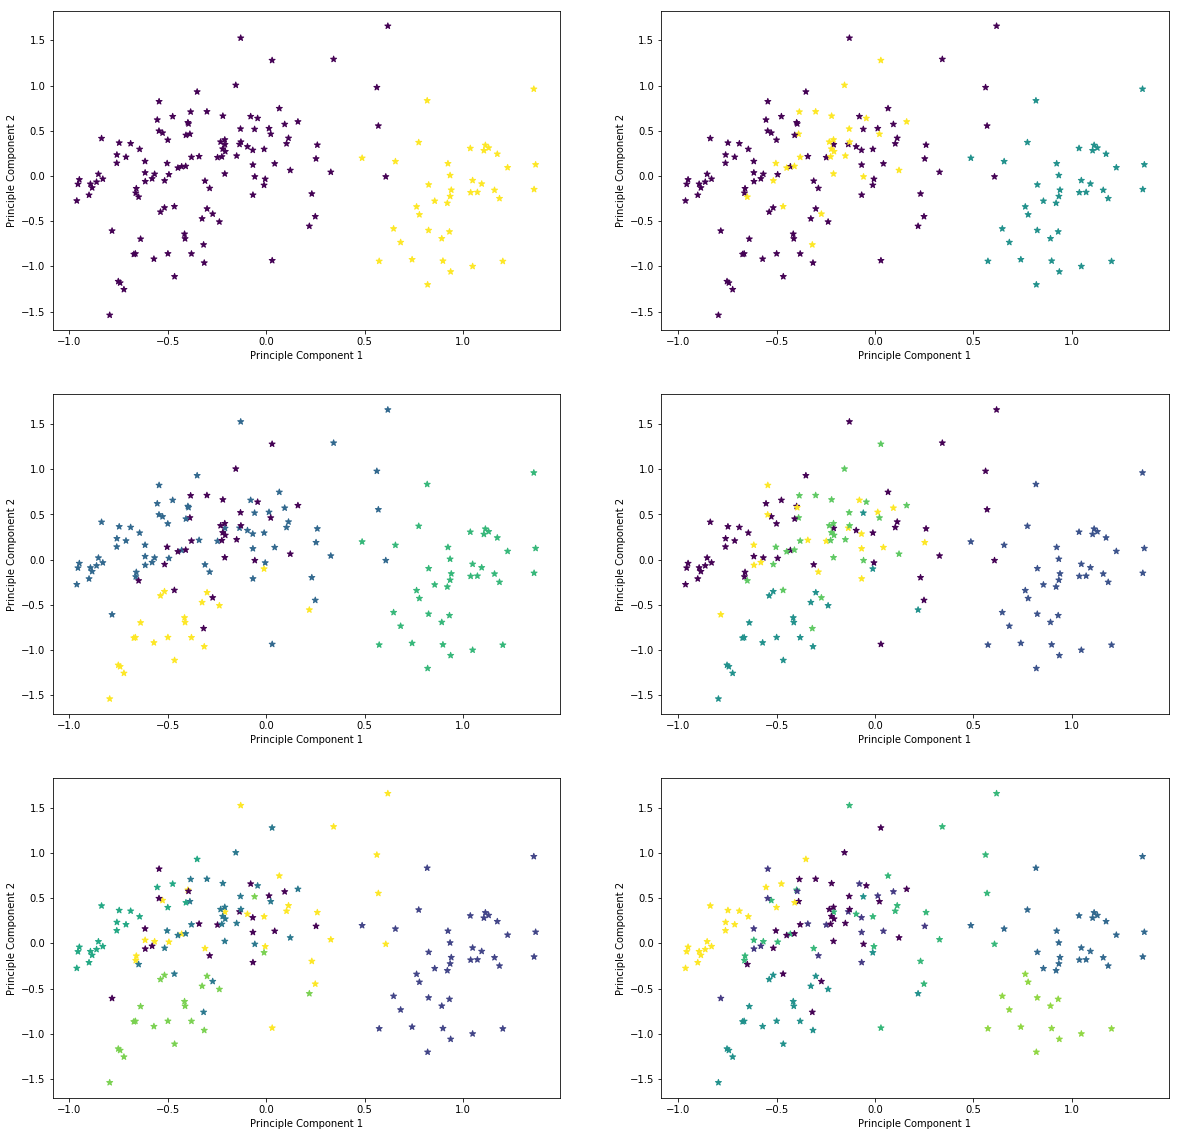

In [340]:
#SpectralClustering on 2015 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2015)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2015[:, 0], data2015[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

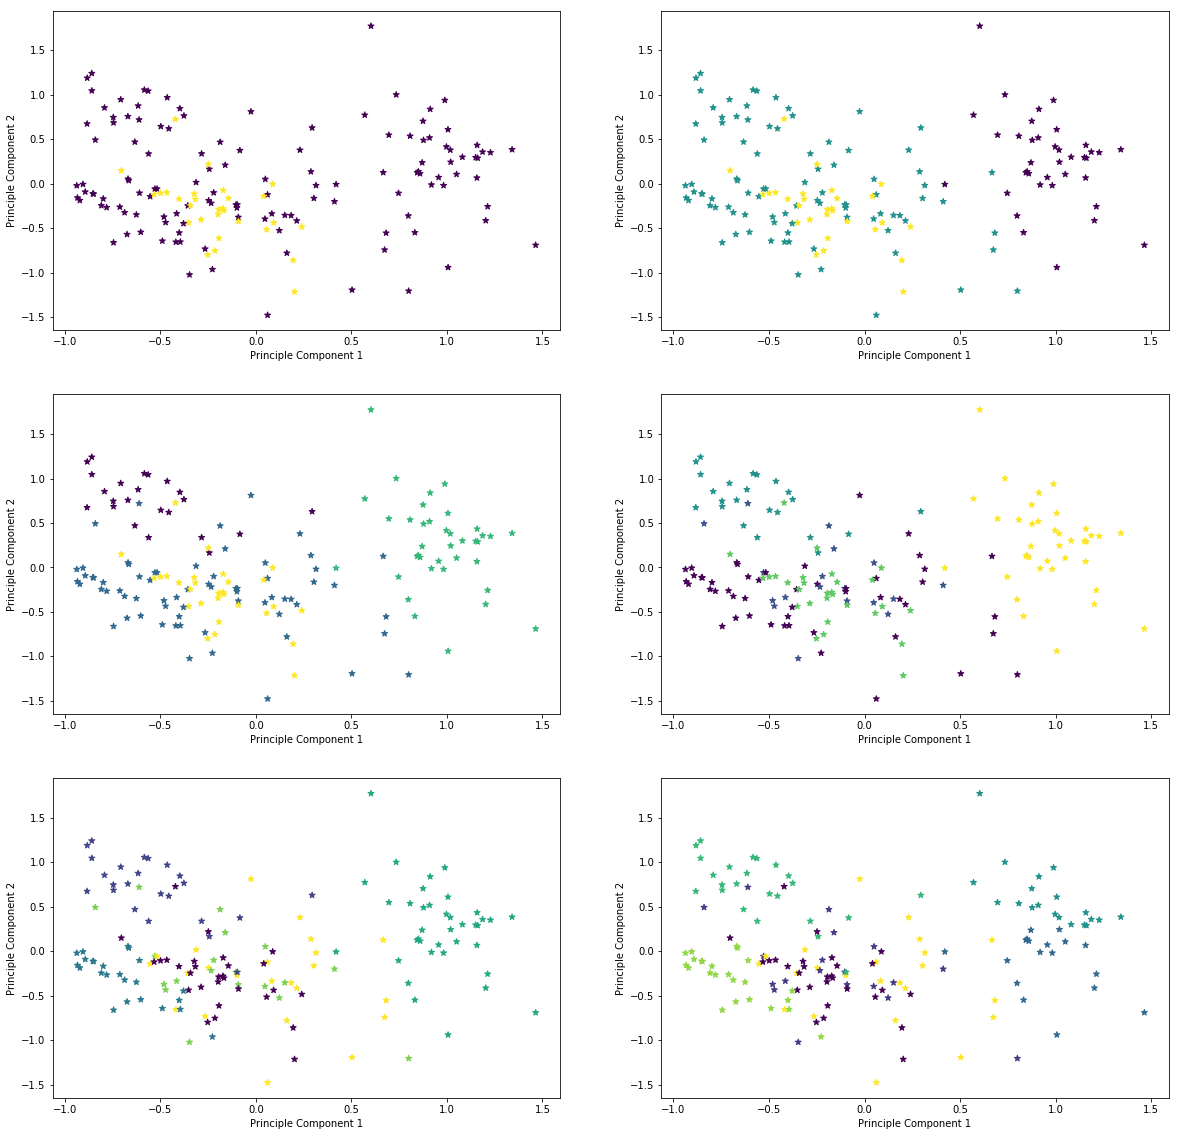

In [341]:
#SpectralClustering on 2016 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2016)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2016[:, 0], data2016[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

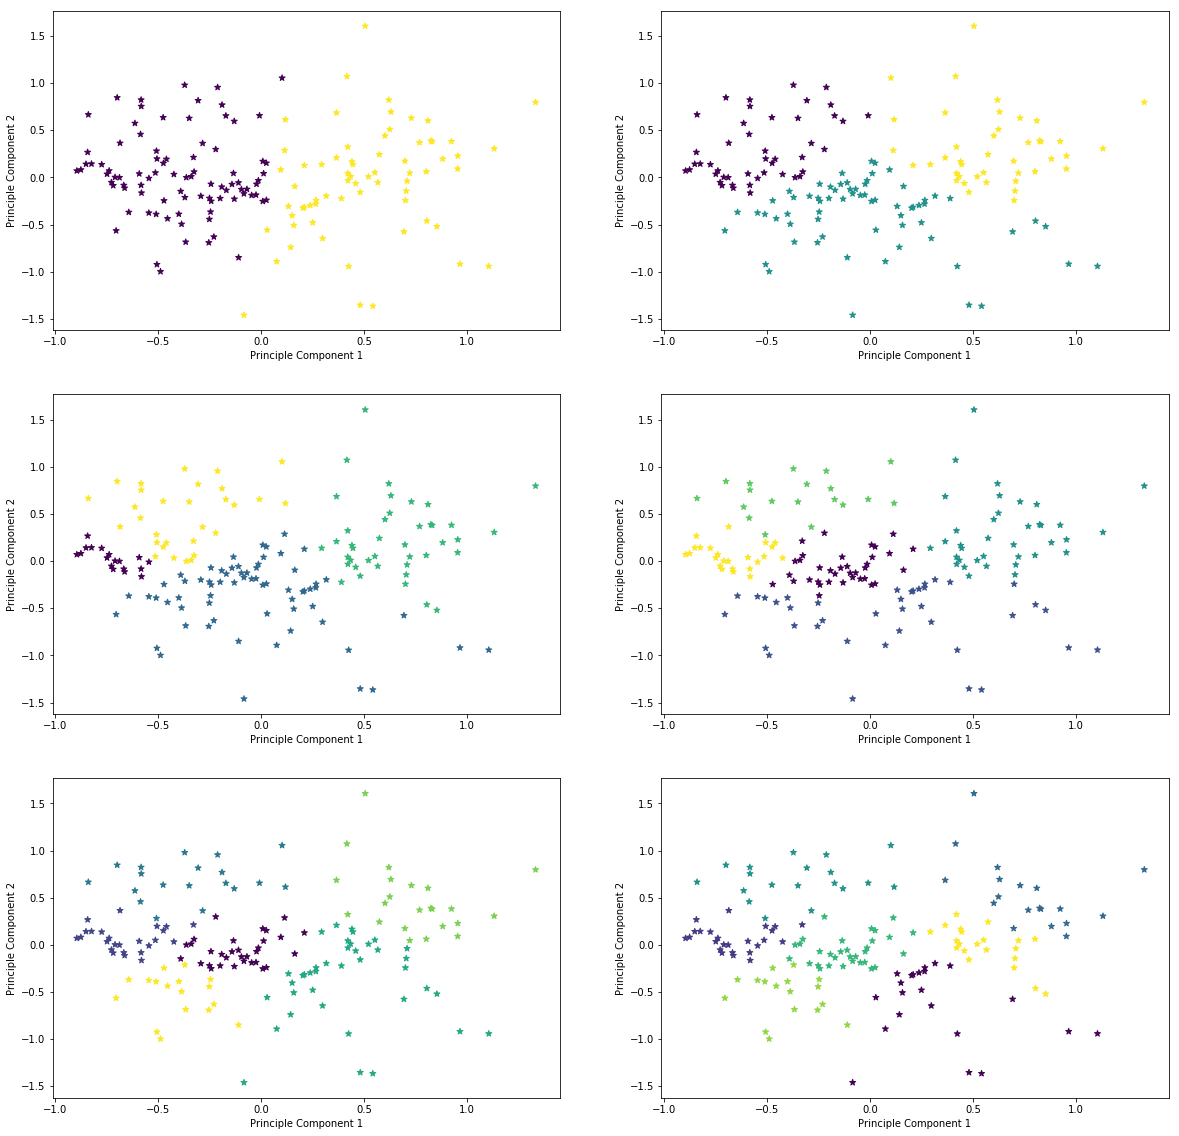

In [342]:
#SpectralClustering on 2017 dataset
plt.figure(figsize=(20,20))
for numClusters in range(2, 8):
    plt.subplot(3,2,numClusters-1)
    cluster = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = cluster.fit_predict(data2017)
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.scatter(data2017[:, 0], data2017[:, 1], c=labels, marker="*", s=40, cmap='viridis')
plt.show()

## Agglomerative Seriation

Since we already clustered with numClusters equal to the number of countries, we simply rank the countries by which cluster they are in.

In [343]:
data2015original.nlargest(20,'agglo') #nlargest is happiest

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
50,Bolivia,Latin America and Caribbean,51,5.890,0.05642,0.68133,0.97841,0.53920,0.57414,0.08800,0.20536,2.82334,123,123,157
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,40,156,156
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,155,155,155
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882,152,153,154
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,154,12,153
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142,65,55,152
47,Ecuador,Latin America and Caribbean,48,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942,1,151,151
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,91,150,150
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,148,148,149
20,United Kingdom,Western Europe,21,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994,140,141,148


In [344]:
data2015original.nsmallest(20,'agglo') #nsmallest is saddest

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,43,43,0
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,95,80,1
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,105,98,2
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,13,17,3
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,14,41,4
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,127,117,5
129,Georgia,Central and Eastern Europe,130,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541,49,81,6
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,149,146,7
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,27,31,8
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,157,68,9


In [345]:
data2016original.nlargest(20,'agglo') #nlargest is happiest

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
85,Serbia,Central and Eastern Europe,86,5.177,5.083,5.271,1.03437,0.81329,0.64580,0.15718,0.04339,0.20737,2.27539,156,156,156
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,112,155,155
55,Russia,Central and Eastern Europe,56,5.856,5.789,5.923,1.23228,1.05261,0.58991,0.32682,0.03586,0.02736,2.59115,145,35,154
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,67,71,153
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,153,10,152
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,150,149,151
50,Ecuador,Latin America and Caribbean,51,5.976,5.880,6.072,0.97306,0.85974,0.68613,0.40270,0.18037,0.10074,2.77366,72,151,150
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,149,97,149
80,Azerbaijan,Central and Eastern Europe,81,5.291,5.226,5.356,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350,1,52,148
44,Slovakia,Central and Eastern Europe,45,6.078,5.996,6.160,1.27973,1.08268,0.70367,0.23391,0.02947,0.13837,2.61065,32,146,147


In [346]:
data2016original.nsmallest(20,'agglo') #nsmallest is saddest

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,86,106,0
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,18,134,1
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,20,19,2
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,135,30,3
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319,117,110,4
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,35,47,5
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,122,128,6
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075,121,126,7
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,102,8,8
140,Angola,Sub-Saharan Africa,141,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459,126,148,9


In [347]:
data2017original.nlargest(20,'agglo') #nlargest is happiest

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
93,Vietnam,94,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319,83,153,154
23,Argentina,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,91,84,153
69,Paraguay,70,5.493,5.577381,5.408619,0.932537,1.507285,0.579251,0.473508,0.224151,0.091066,1.685333,152,118,152
75,Jamaica,76,5.311,5.581399,5.040601,0.925579,1.368218,0.641022,0.474307,0.233818,0.055268,1.612326,15,35,151
12,Austria,13,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506,47,2,150
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,78,86,149
71,Philippines,72,5.430,5.545335,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,0.099332,1.972605,148,147,148
41,Malaysia,42,6.084,6.179980,5.988021,1.291215,1.284646,0.618784,0.402265,0.416609,0.065601,2.004449,147,148,147
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,44,20,146
11,Costa Rica,12,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639,75,88,145


In [348]:
data2017original.nsmallest(20,'agglo') #nsmallest is saddest

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,24,24,0
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,64,6,1
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,34,15,2
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,20,76,3
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,11,13,4
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,108,99,5
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,65,52,6
145,Yemen,146,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,38,28,7
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,88,103,8
143,Madagascar,144,3.644,3.714319,3.573681,0.305809,0.913020,0.375223,0.189197,0.208733,0.067232,1.584613,104,9,9


## KMeans Seriation

In [349]:
data2015original.nlargest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,157,68,9
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,156,0,138
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,155,155,155
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,154,12,153
79,Azerbaijan,Central and Eastern Europe,80,5.212,0.03363,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799,2.00073,153,154,76
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882,152,153,154
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320,151,27,126
57,Peru,Latin America and Caribbean,58,5.824,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450,150,67,53
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,149,146,7
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,148,148,149


In [350]:
data2015original.nsmallest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145,0,88,93
47,Ecuador,Latin America and Caribbean,48,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942,1,151,151
69,Turkmenistan,Central and Eastern Europe,70,5.548,0.04175,0.95847,1.22668,0.53886,0.47610,0.30844,0.16979,1.86984,2,103,131
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323,3,127,128
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319,4,35,55
134,Egypt,Middle East and Northern Africa,135,4.194,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927,5,4,46
35,Spain,Western Europe,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367,6,2,118
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794,7,139,67
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100,8,111,12
91,Morocco,Middle East and Northern Africa,92,5.013,0.03420,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373,9,44,99


In [351]:
data2016original.nlargest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
85,Serbia,Central and Eastern Europe,86,5.177,5.083,5.271,1.03437,0.81329,0.64580,0.15718,0.04339,0.20737,2.27539,156,156,156
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,155,89,93
59,Lithuania,Central and Eastern Europe,60,5.813,5.734,5.892,1.26920,1.06411,0.64674,0.18929,0.01820,0.02025,2.60525,154,154,110
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,153,10,152
12,United States,North America,13,7.104,7.020,7.188,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782,152,153,102
63,Peru,Latin America and Caribbean,64,5.743,5.647,5.839,0.99602,0.81255,0.62994,0.37502,0.05292,0.14527,2.73117,151,58,69
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,150,149,151
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,149,97,149
23,Chile,Latin America and Caribbean,24,6.705,6.615,6.795,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,2.95505,148,147,146
132,Sudan,Sub-Saharan Africa,133,4.139,3.928,4.350,0.63069,0.81928,0.29759,0.00000,0.10039,0.18077,2.10995,147,50,35


In [352]:
data2016original.nsmallest(20,'kmeans')

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,kmeans,gmm,agglo
45,El Salvador,Latin America and Caribbean,46,6.068,5.967,6.169,0.87370,0.80975,0.59600,0.37269,0.10613,0.08877,3.22134,0,55,138
80,Azerbaijan,Central and Eastern Europe,81,5.291,5.226,5.356,1.12373,0.76042,0.54504,0.35327,0.17914,0.05640,2.27350,1,52,148
124,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,4.191,4.353,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,2.74924,2,7,19
15,Germany,Western Europe,16,6.994,6.930,7.058,1.44787,1.09774,0.81487,0.53466,0.28551,0.30452,2.50931,3,81,104
111,Iraq,Middle East and Northern Africa,112,4.575,4.446,4.704,1.07474,0.59205,0.51076,0.24856,0.13636,0.19589,1.81657,4,91,46
101,Laos,Southeastern Asia,102,4.876,4.742,5.010,0.68042,0.54970,0.38291,0.52168,0.22423,0.43079,2.08637,5,67,55
126,Congo (Brazzaville),Sub-Saharan Africa,127,4.236,4.107,4.365,0.77109,0.47799,0.28212,0.37938,0.09753,0.12077,2.10681,6,139,32
37,Algeria,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,7,14,79
52,Japan,Eastern Asia,53,5.921,5.850,5.992,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224,1.80584,8,31,108
69,Paraguay,Latin America and Caribbean,70,5.538,5.453,5.623,0.89373,1.11111,0.58295,0.46235,0.07396,0.25296,2.16091,9,48,47


In [353]:
data2017original.nlargest(20,'kmeans')

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,154,29,37
107,Iran,108,4.692,4.798225,4.585775,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,153,3,75
69,Paraguay,70,5.493,5.577381,5.408619,0.932537,1.507285,0.579251,0.473508,0.224151,0.091066,1.685333,152,118,152
91,Macedonia,92,5.175,5.272173,5.077828,1.064578,1.207893,0.644948,0.325906,0.253761,0.060278,1.617469,151,149,128
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,150,150,118
16,Belgium,17,6.891,6.955821,6.826179,1.463781,1.462313,0.818092,0.539771,0.231503,0.251343,2.124210,149,151,95
71,Philippines,72,5.430,5.545335,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,0.099332,1.972605,148,147,148
41,Malaysia,42,6.084,6.179980,5.988021,1.291215,1.284646,0.618784,0.402265,0.416609,0.065601,2.004449,147,148,147
84,Azerbaijan,85,5.234,5.299287,5.168714,1.153602,1.152400,0.540776,0.398156,0.045269,0.180988,1.762482,146,128,73
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,145,146,78


In [354]:
data2017original.nsmallest(20,'kmeans')

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,gmm,agglo
89,Bosnia and Herzegovina,90,5.182,5.276336,5.087665,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173,0,58,100
45,Poland,46,5.973,6.053908,5.892092,1.291788,1.445712,0.699475,0.520342,0.158466,0.059308,1.797723,1,113,123
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,2,45,18
35,Colombia,36,6.357,6.452020,6.261980,1.070622,1.402183,0.595028,0.477487,0.149014,0.046669,2.616068,3,4,84
99,Mongolia,100,4.955,5.021680,4.888320,1.027236,1.493011,0.557783,0.394144,0.338464,0.032902,1.111292,4,65,68
79,Pakistan,80,5.269,5.359984,5.178016,0.726884,0.672691,0.402048,0.235215,0.315446,0.124348,2.792489,5,10,90
13,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,6,110,94
98,Nepal,99,4.962,5.067356,4.856644,0.479820,1.179283,0.504131,0.440306,0.394096,0.072976,1.891241,7,93,45
141,Botswana,142,3.766,3.874123,3.657877,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914,8,16,14
50,Japan,51,5.920,5.990719,5.849281,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224,9,59,74


## Conclusion

A. Without using any "Happiness" information given, conduct proper Clusterings Analyses and describe these clusters.

B. Without using any "Happiness" information given, conduct proper Seriation Analyses and compare the generated order with the "Happiness" ranking.

C. Report your findings, including investigations and discussions to support or reflute the following remarks:

1) Norway tops the global happiness rankings for all three years 2015, 2016, and 2017.

Answer: Norway tops in the original dataset of happiness ranking but Bolivia, serbia and vietnam tops the ranking according to seriation analysis of data2015, data2016, data2017 respectively. My clustering have found Chad, serbia and south sudan tops the Kmeans seriation in data2015, data2016 and data2017 respectively.

 2) All top ten countries rank highly on all the main features found to support happiness.
 
 Answer: It seems top ten countries indeed having the high rankings and scores in some features but low in some features like Kmeans seriation score for instance Kmeans of panama and Ecuador is very low in numbers of 40 and 1 respectively.

 3) Happiness is both social and personal.
 
 Answer: Yes Happiness founds to be both social and personal as all factors involved which influence happiness by ecomic and government.

 4) Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness
 
 Answer: This is true indeed unemployment caused a major fall in happiness also other factors mattered and happiness get influenced by those like economy and health.

 5) China are no happier than most countries, though richer and longer longevity
 
 Answer: China did not appeared anywhere in the happiness ranking which seems as no more the happier country as I found Serbia being the most happiest according to both seriation analysis. 

 6) Much of Africa is struggling
 
 Answer: Sub-saharan Africa and central african republic seems to be the most saddest in all analysis of years

 7) Happiness has fallen in America
 
 Answer: It seems America did not topped but is not lowest as well It pretty in middle and average in happiness regions of all years.